# Descriptive analysis

In [2]:
import pandas as pd # type: ignore
import opendatasets as od # type: ignore
import numpy as np # type: ignore
from matplotlib import pyplot as plt # type: ignore
from collections import Counter # type: ignore
import geopandas as gpd # type: ignore
import time # type: ignore

## game_set dataset

In [3]:
game_set = pd.read_csv('./game_set.csv')

In [4]:
game_set

,name_surname,birth,first_profession,second_profession,third_profession,type,title,adult,start_year,minutes_runtimes,genre_1,genre_2,genre_3
0,Fred Astaire,1899,actor,miscellaneous,producer,movie,The Towering Inferno,0,1974,165,Action,Drama,Thriller
1,Lauren Bacall,1924,actress,soundtrack,archive_footage,movie,To Have and Have Not,0,1944,100,Adventure,Comedy,Film-Noir
2,Brigitte Bardot,1934,actress,music_department,producer,movie,Contempt,0,1963,102,Drama,Romance,NaN
3,John Belushi,1949,actor,writer,music_department,tv series,Saturday Night Live,0,1975,90,Comedy,Music,NaN
4,Ingmar Bergman,1918,writer,director,actor,movie,Wild Strawberries,0,1957,92,Drama,Romance,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300473,Benjamin Dino,1996,actor,NaN,NaN,movie,Sunset,0,2018,142,Drama,History,NaN
1300474,Thomas Hou Mandsfeldt,1973,actor,producer,NaN,movie,Rose,0,2022,106,Comedy,Drama,NaN
1300475,Yuki Katayama,1996,actress,NaN,NaN,movie,Convenience Story,0,2022,97,Comedy,Fantasy,Romance
1300476,Pardeep Singh Sooch,1987,actor,NaN,NaN,movie,Don't Say Its Name,0,2021,84,Drama,Horror,Mystery


## numpy library

In [5]:
movies = game_set.loc[game_set['type'] == 'movie'] # sub-set of the initial dataset containing only movies 

In [6]:
np.max(movies['start_year']) # maximum value in 'star_year' for movies set

2026

In [7]:
np.min(movies['start_year']) # minimum value in 'star_year' for movies set

1894

In [8]:
tv_series = game_set.loc[game_set['type'] == 'tv series'] # sub-set of the initial dataset containing only tv series

In [9]:
np.max(tv_series['start_year']) # maximum value in 'star_year' for tv series set

2025

In [10]:
np.min(tv_series['start_year']) # minimum value in 'star_year' for tv series set

1930

In [11]:
actors = game_set.loc[(game_set['first_profession'] == 'actor') | (game_set['first_profession'] == 'actress')] # sub-set of the initial dataset containing only actors

In [12]:
birth = actors['birth'].to_numpy()
round(np.mean(birth)) # mean value of the year of birth of actors

1954

In [13]:
time.localtime().tm_year - round(np.mean(birth)) # average age of actors in the dataset

70

In [14]:
round(np.mean(movies['minutes_runtimes'])) # mean of variable 'minutes_runtimes' for the movie sub-set

101

In [15]:
round(np.mean(tv_series['minutes_runtimes'])) # mean of variable 'minutes_runtimes' for the tv seires sub-set

55

In [16]:
total_minutes = np.sum(game_set['minutes_runtimes']) # sum of all the values in the variable 'minutes_runtimes'
total_hours = round(np.divide(total_minutes, 60)) # conversion to hours
total_days = round(np.divide(total_hours, 24)) # conversion to days
total_years = round(np.divide(total_days, 365)) # conversion to years

print(f'the total number of minuter are {total_minutes}')
print(f'the total number of hours are {total_hours}')
print(f'the total number of days are {total_days}')
print(f'the total number of years are {total_years}')

the total number of minuter are 114538358
the total number of hours are 1908973
the total number of days are 79541
the total number of years are 218


In [17]:
np.min(game_set['minutes_runtimes']) # minimum value of the 'minutes_runtimes' variable

1

In [18]:
np.max(game_set['minutes_runtimes']) # maximum value of the 'minutes_runtimes' variable

43200

In [19]:
game_set.loc[game_set['minutes_runtimes'] == np.max(game_set['minutes_runtimes'])] # information about the longest movie in the dataset 

,name_surname,birth,first_profession,second_profession,third_profession,type,title,adult,start_year,minutes_runtimes,genre_1,genre_2,genre_3
374708,Anders Weberg,1968,director,cinematographer,writer,movie,Ambiancé,0,2020,43200,Documentary,NaN,NaN


## matplotlib library

### minutes runtimes

In [20]:
quantile = movies['minutes_runtimes'].quantile(0.99) # 99th percentile of the variable 'minutes_runtimes' of the movie sub-set 
minutes_runtimes_filtered = movies[(movies['minutes_runtimes'] < quantile)] # consider only the movies that last less than the 99th percentile movies

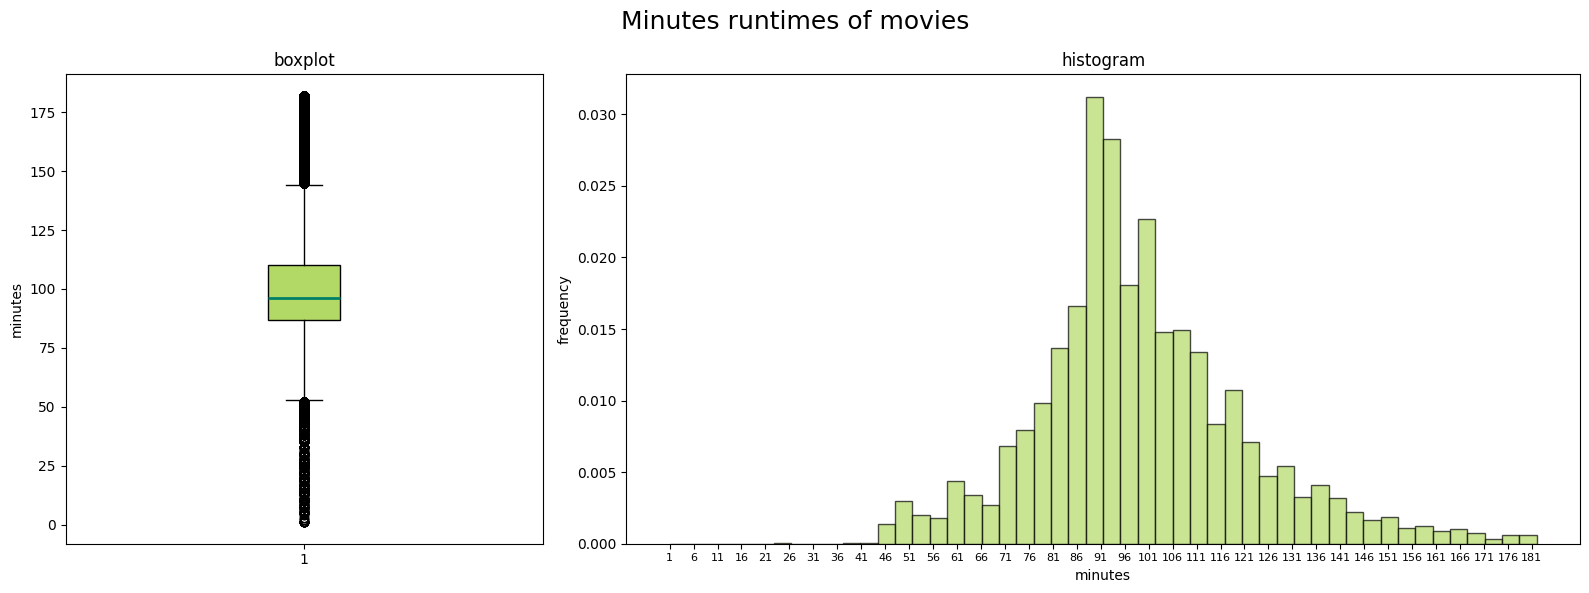

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1, 2]}) # figure with two sub-plots
# '1,2' indicates 1 row and 2 columns of subplots and gridspec_kw adjusts the relative width of the two subplots (1:2 ratio)

# create a box plot in the first subplot (axes[0])
box = axes[0].boxplot(minutes_runtimes_filtered['minutes_runtimes'], patch_artist=True) 
for element in box['boxes']:
    element.set(facecolor="#B2D966") 
for element in box['medians']:
    element.set(color="#008066", linewidth=2)
axes[0].set_title('boxplot', fontsize=12)
axes[0].set_ylabel('minutes')

# create a histogram in the second subplot (axes[1])
axes[1].hist(minutes_runtimes_filtered['minutes_runtimes'], bins=50, color='#B2D966', alpha=0.7, edgecolor='black', density=True)
axes[1].set_title('histogram', fontsize=12)
axes[1].set_xlabel('minutes', fontsize=10)
axes[1].set_ylabel('frequency', fontsize=10)
axes[1].set_xticks(np.arange(minutes_runtimes_filtered['minutes_runtimes'].min(), minutes_runtimes_filtered['minutes_runtimes'].max(), step=5))
axes[1].tick_params(axis='x', labelsize=8)

fig.suptitle('Minutes runtimes of movies', fontsize=18)

plt.tight_layout()
plt.show()

### type

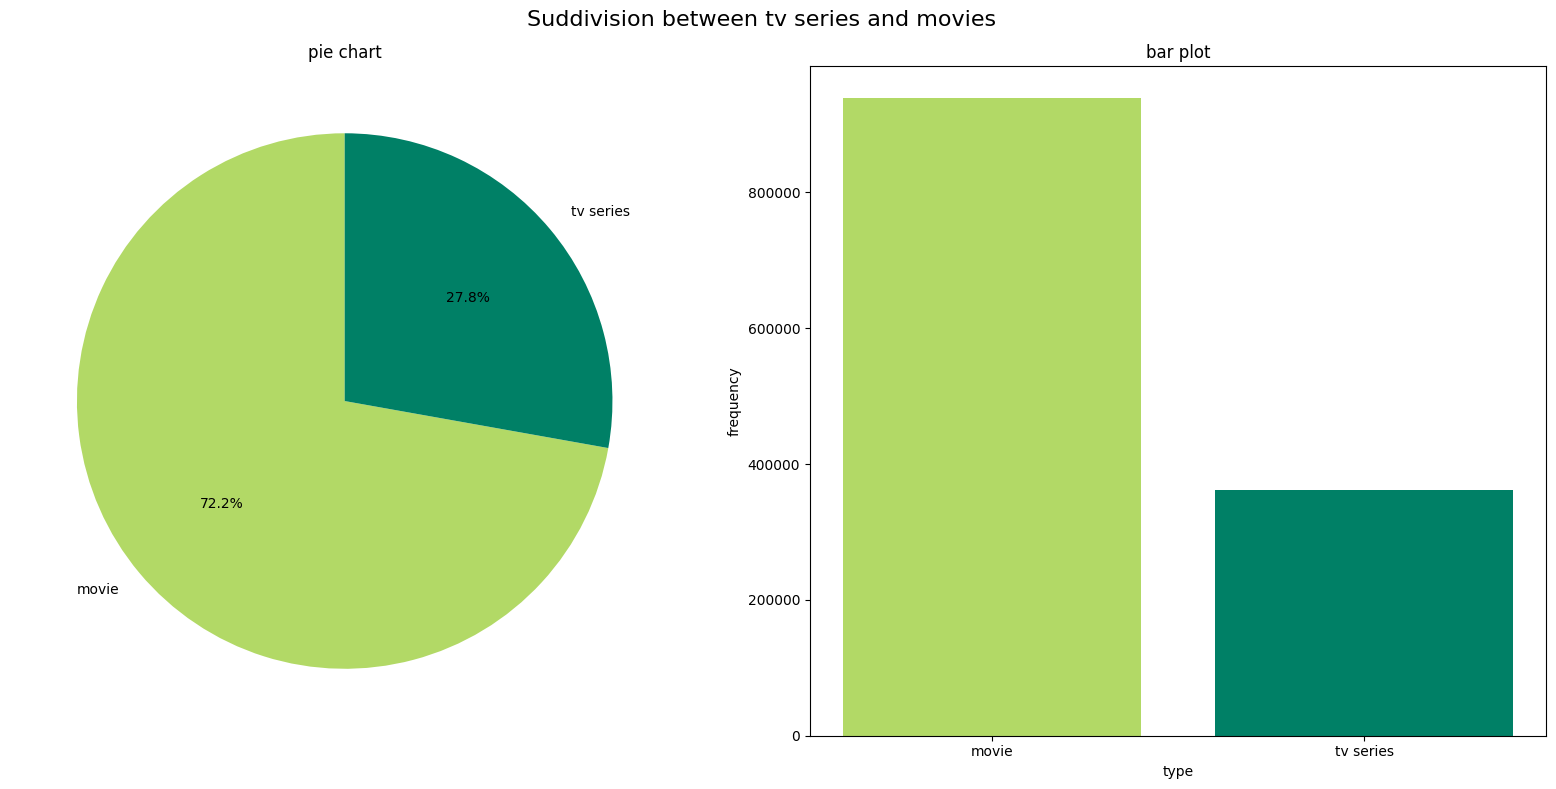

In [36]:
# count the occurrences of each type("tv series", "movies") in the 'game_set['type']' column
type_counts = Counter(game_set['type'])
categories = list(type_counts.keys()) # extract unique categories
frequencies = list(type_counts.values()) # extract corresponding frequencies

# figure with two subplots arranged side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# create a pie chart in the first subplot (axes[0])
axes[0].pie(frequencies, labels=categories, colors=['#B2D966', '#008066'], autopct='%1.1f%%', startangle=90)
axes[0].set_title("pie chart", fontsize=12)

# create a bar plot in the first subplot (axes[0])
axes[1].bar(categories, frequencies, color=['#B2D966', '#008066'])
axes[1].set_title("bar plot", fontsize=12)
axes[1].set_ylabel("frequency", fontsize=10)
axes[1].set_xlabel("type", fontsize=10)
axes[1].set_xticks(categories)  
axes[1].set_xticklabels(categories) 

fig.suptitle('Suddivision between tv series and movies', fontsize=16)

plt.tight_layout()
plt.show()

### starting year

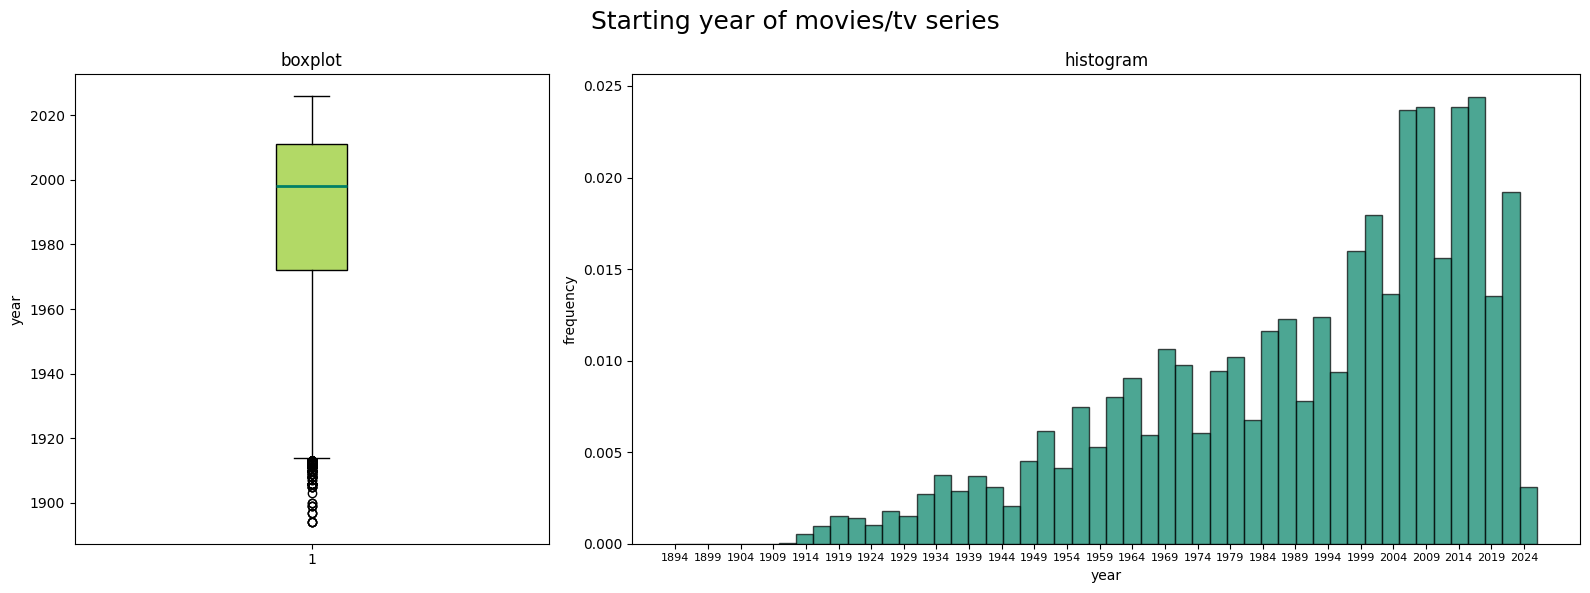

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1, 2]})

box = axes[0].boxplot(game_set['start_year'], patch_artist=True)
for element in box['boxes']:
    element.set(facecolor="#B2D966") 
for element in box['medians']:
    element.set(color="#008066", linewidth=2)
axes[0].set_title('boxplot', fontsize=12)
axes[0].set_ylabel('year')

axes[1].hist(game_set['start_year'], bins=50, color='#008066', alpha=0.7, edgecolor='black', density=True)
axes[1].set_title('histogram', fontsize=12)
axes[1].set_xlabel('year', fontsize=10)
axes[1].set_ylabel('frequency', fontsize=10)
axes[1].set_xticks(np.arange(game_set['start_year'].min(), game_set['start_year'].max(), step=5))
axes[1].tick_params(axis='x', labelsize=8)

fig.suptitle('Starting year of movies/tv series', fontsize=18)

plt.tight_layout()
plt.show()

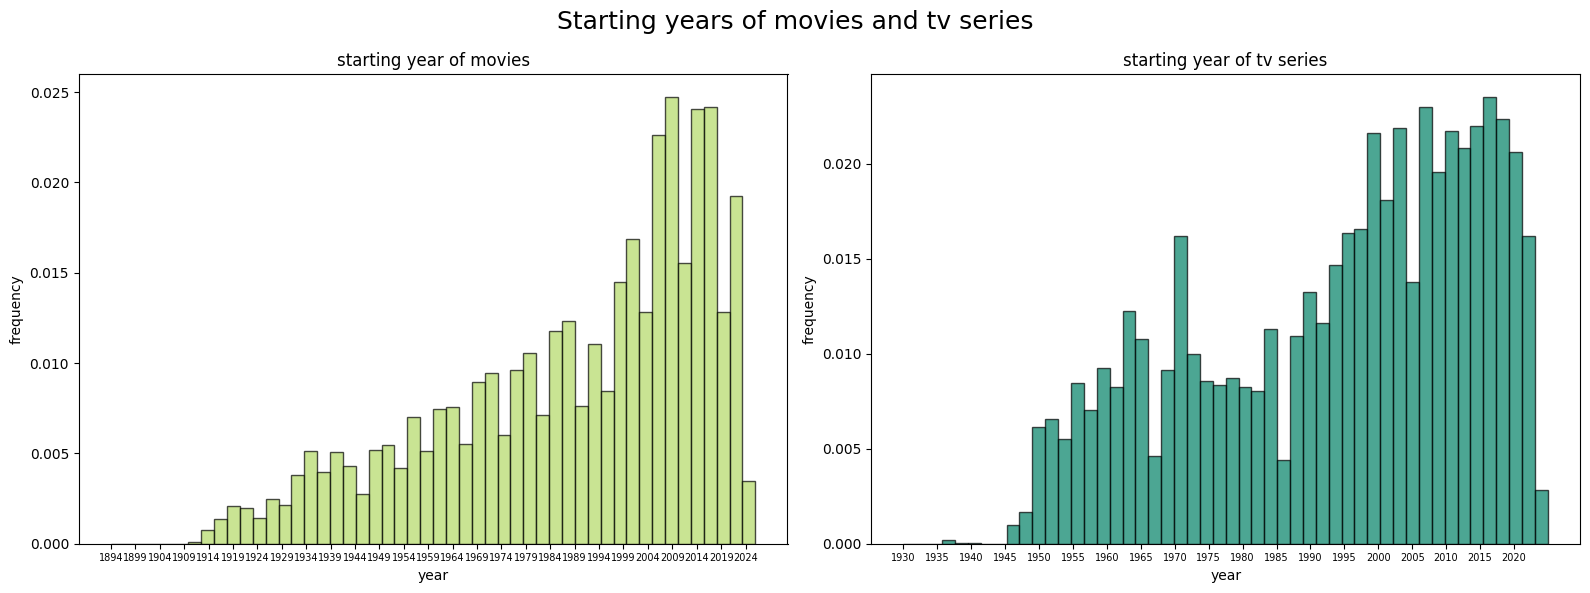

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].hist(movies['start_year'], bins=50, color='#B2D966', alpha=0.7, edgecolor='black', density=True)
axes[0].set_title('starting year of movies', fontsize=12)
axes[0].set_xlabel('year', fontsize=10)
axes[0].set_ylabel('frequency', fontsize=10)
axes[0].set_xticks(np.arange(movies['start_year'].min(), movies['start_year'].max(), step=5))
axes[0].tick_params(axis='x', labelsize=7)
axes[0].grid(False)

axes[1].hist(tv_series['start_year'], bins=50, color='#008066', alpha=0.7, edgecolor='black', density=True)
axes[1].set_title('starting year of tv series', fontsize=12)
axes[1].set_xlabel('year', fontsize=10)
axes[1].set_ylabel('frequency', fontsize=10)
axes[1].set_xticks(np.arange(tv_series['start_year'].min(), tv_series['start_year'].max(), step=5))
axes[1].tick_params(axis='x', labelsize=7)
axes[1].grid(False)

fig.suptitle('Starting years of movies and tv series', fontsize=18)

plt.tight_layout()  
plt.show()

### profession

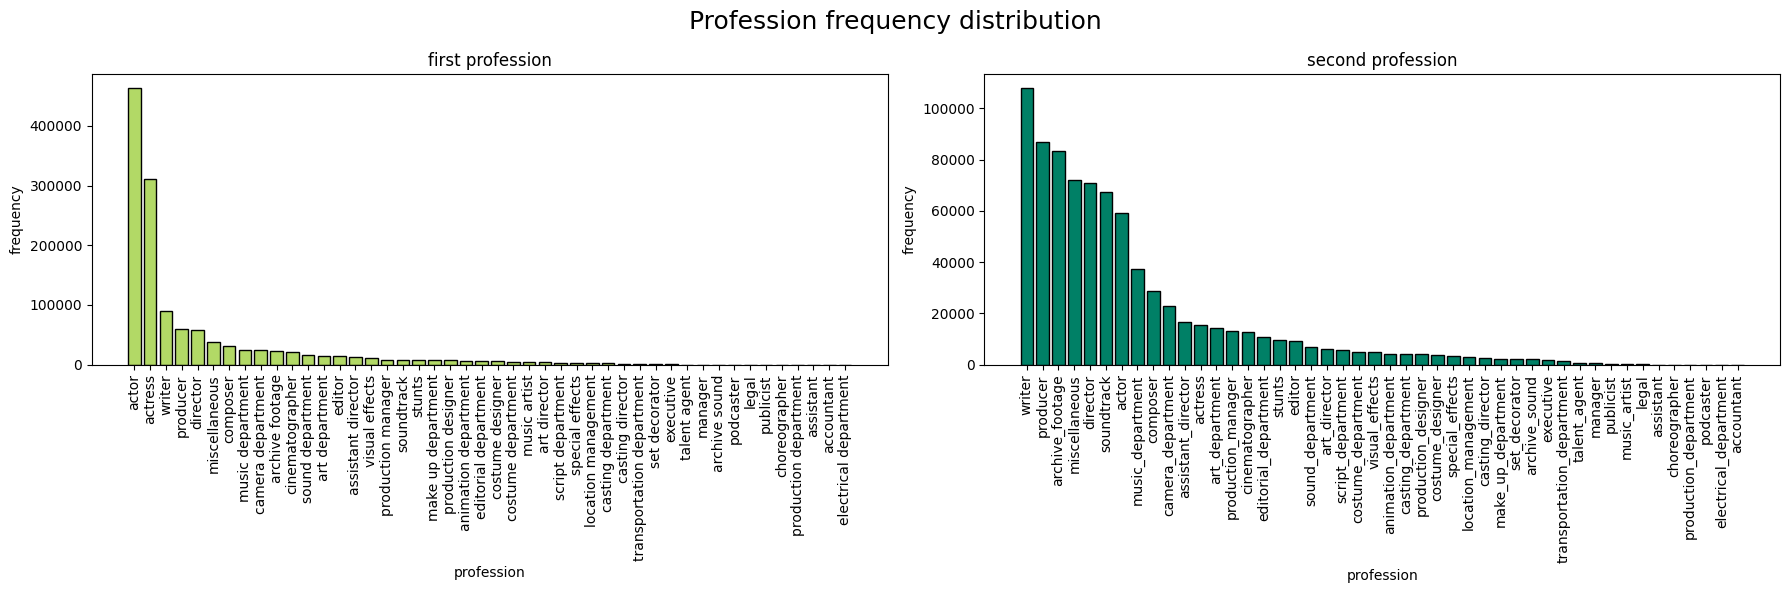

In [39]:
profession_counts_1 = Counter(game_set['first_profession'])
categories_1 = list(profession_counts_1.keys())
frequencies_1 = list(profession_counts_1.values())
sorted_indices_1 = sorted(range(len(frequencies_1)), key=lambda i: frequencies_1[i], reverse=True)
sorted_categories_1 = [categories_1[i] for i in sorted_indices_1]
sorted_frequencies_1 = [frequencies_1[i] for i in sorted_indices_1]

profession_counts_2 = Counter(game_set['second_profession'].dropna())
categories_2 = list(profession_counts_2.keys())
frequencies_2 = list(profession_counts_2.values())
sorted_indices_2 = sorted(range(len(frequencies_2)), key=lambda i: frequencies_2[i], reverse=True)
sorted_categories_2 = [categories_2[i] for i in sorted_indices_2]
sorted_frequencies_2 = [frequencies_2[i] for i in sorted_indices_2]

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

axes[0].bar(sorted_categories_1, sorted_frequencies_1, color='#B2D966', edgecolor='black')
axes[0].set_title('first profession', fontsize=12)
axes[0].set_xlabel('profession', fontsize=10)
axes[0].set_ylabel('frequency', fontsize=10)
axes[0].tick_params(axis='x', rotation=90)

axes[1].bar(sorted_categories_2, sorted_frequencies_2, color='#008066', edgecolor='black')
axes[1].set_title('second profession', fontsize=12)
axes[1].set_xlabel('profession', fontsize=10)
axes[1].set_ylabel('frequency', fontsize=10)
axes[1].tick_params(axis='x', rotation=90)

fig.suptitle('Profession frequency distribution', fontsize=18)

plt.tight_layout()
plt.show()

### genre

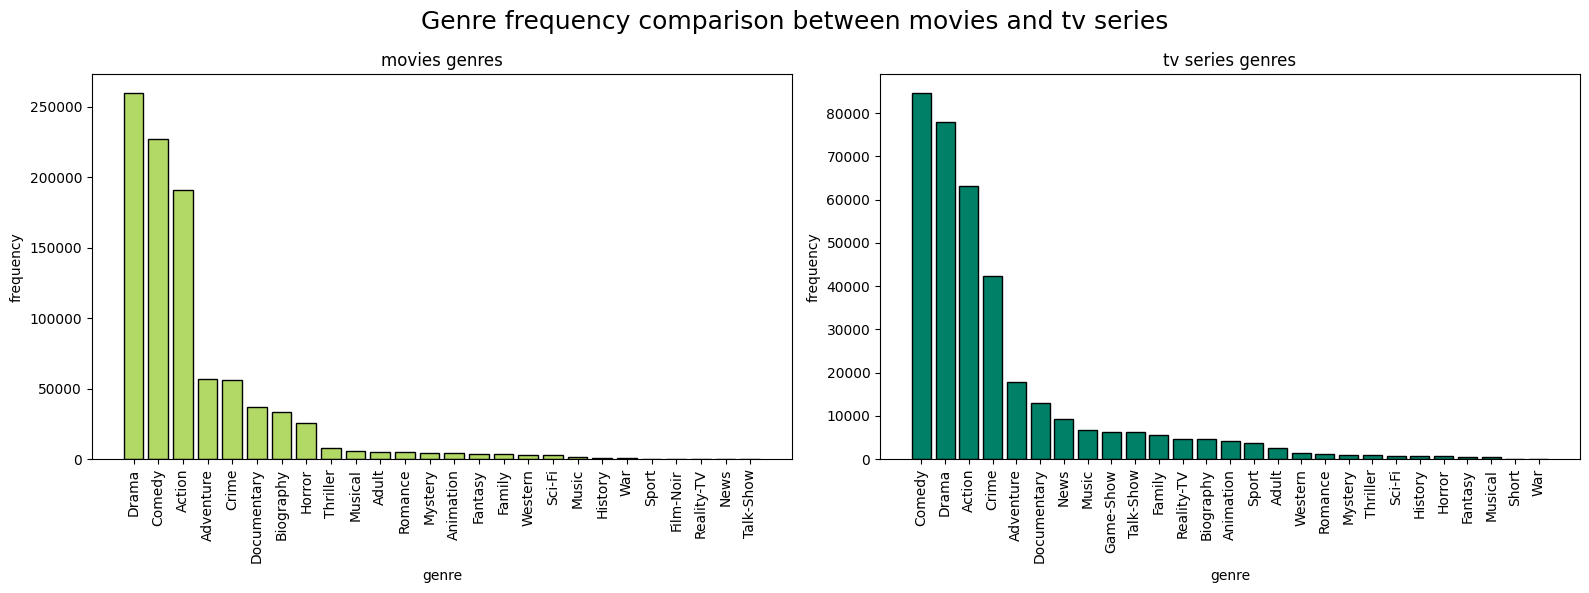

In [40]:
profession_counts_movie = Counter(movies['genre_1'])
categories_movie = list(profession_counts_movie.keys())
frequencies_movie = list(profession_counts_movie.values())
sorted_indices_movie = sorted(range(len(frequencies_movie)), key=lambda i: frequencies_movie[i], reverse=True)
sorted_categories_movie = [categories_movie[i] for i in sorted_indices_movie]
sorted_frequencies_movie = [frequencies_movie[i] for i in sorted_indices_movie]

profession_counts_tvseries = Counter(tv_series['genre_1'])
categories_tvseries = list(profession_counts_tvseries.keys())
frequencies_tvseries = list(profession_counts_tvseries.values())
sorted_indices_tvseries = sorted(range(len(frequencies_tvseries)), key=lambda i: frequencies_tvseries[i], reverse=True)
sorted_categories_tvseries = [categories_tvseries[i] for i in sorted_indices_tvseries]
sorted_frequencies_tvseries = [frequencies_tvseries[i] for i in sorted_indices_tvseries]


fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].bar(sorted_categories_movie, sorted_frequencies_movie, color='#B2D966', edgecolor='black')
axes[0].set_title('movies genres', fontsize=12)
axes[0].set_xlabel('genre', fontsize=10)
axes[0].set_ylabel('frequency', fontsize=10)
axes[0].tick_params(axis='x', labelrotation=90)

axes[1].bar(sorted_categories_tvseries, sorted_frequencies_tvseries, color='#008066', edgecolor='black')
axes[1].set_title('tv series genres', fontsize=12)
axes[1].set_xlabel('genre', fontsize=10)
axes[1].set_ylabel('frequency', fontsize=10)
axes[1].tick_params(axis='x', labelrotation=90)

fig.suptitle('Genre frequency comparison between movies and tv series', fontsize=18)

plt.tight_layout()
plt.show()

### adult

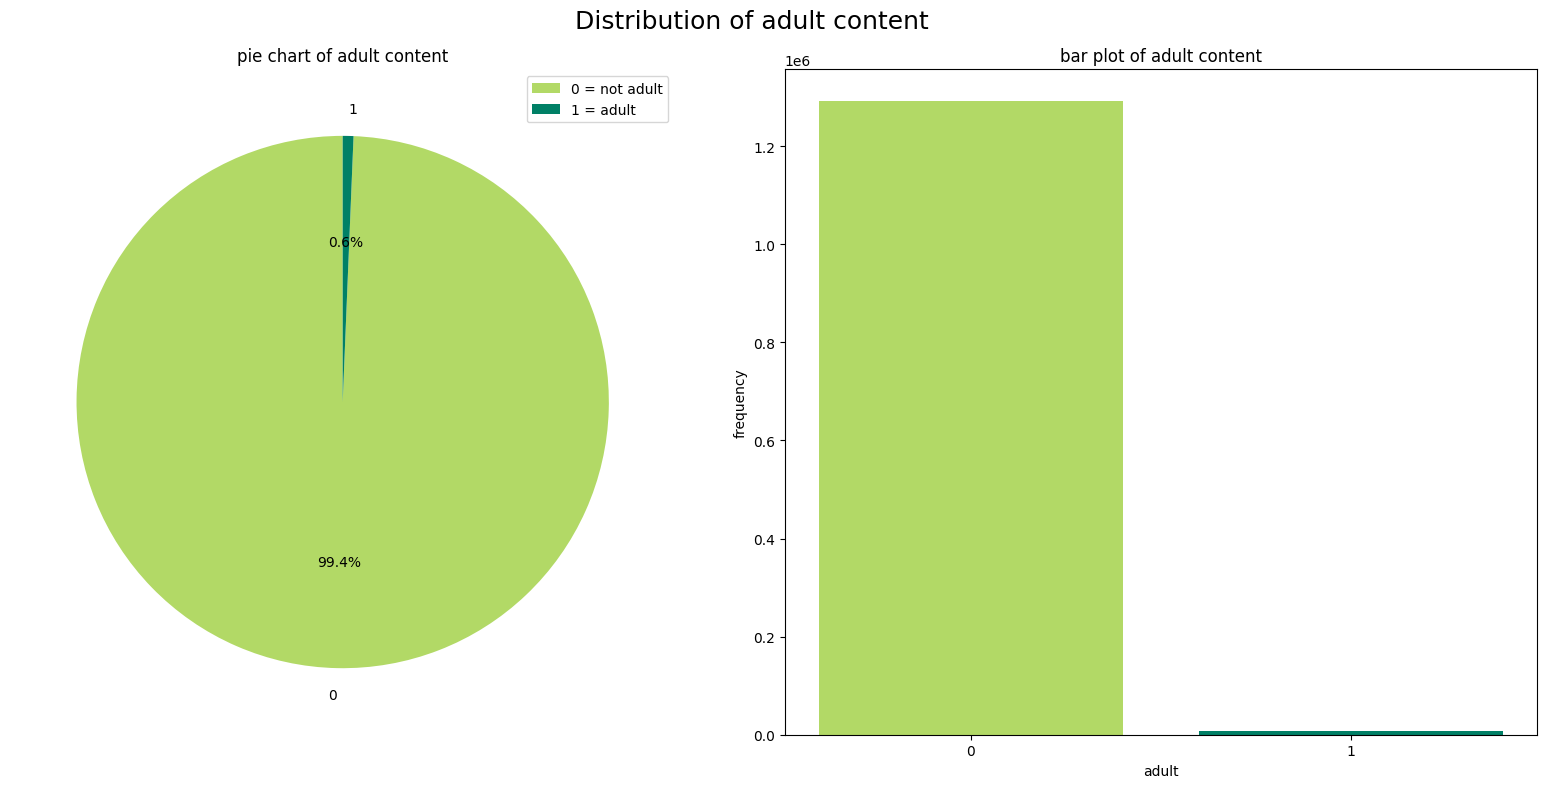

In [41]:
adult_counts = Counter(game_set['adult'])
categories = list(adult_counts.keys())
frequencies = list(adult_counts.values())

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].pie(frequencies, labels=categories, colors=['#B2D966', '#008066'], autopct='%1.1f%%', startangle=90)
axes[0].set_title("pie chart of adult content", fontsize=12)
axes[0].legend(["0 = not adult", "1 = adult"], loc="best")

axes[1].bar(categories, frequencies, color=['#B2D966', '#008066'])
axes[1].set_title("bar plot of adult content", fontsize=12)
axes[1].set_ylabel("frequency", fontsize=10)
axes[1].set_xlabel("adult", fontsize=10)
axes[1].set_xticks(categories)  
axes[1].set_xticklabels(categories) 

fig.suptitle('Distribution of adult content', fontsize=18)

plt.tight_layout() 
plt.show()

## merge_set dataset

In [28]:
merge_set = pd.read_csv('./merge_set.csv') # merge_set has the 'region' column

In [29]:
countries_counts = Counter(merge_set['region'].dropna(how='any')) # count the countries in merge_set

df = pd.DataFrame({'country': list(countries_counts.keys()), 'frequency': list(countries_counts.values())})

In [30]:
df['country'].unique() # iso2 code for every country in merge_set 

array(['US', 'AR', 'MX', 'PE', 'VE', 'AT', 'DE', 'XWG', 'CA', 'AU', 'FR',
       'CSHH', 'SK', 'PT', 'IR', 'DK', 'ES', 'NO', 'BR', 'RO', 'TR', 'IT',
       'EE', 'FI', 'LT', 'TH', 'GR', 'HR', 'PL', 'EC', 'HU', 'CZ', 'SE',
       'JP', 'KR', 'BE', 'BG', 'GB', 'SUHH', 'RS', 'UA', 'TW', 'IL', 'IN',
       'NL', 'PH', 'XYU', 'SI', 'CN', 'XWW', 'UY', 'ZA', 'HK', 'EG', 'VN',
       'LV', 'ID', 'AE', 'SG', 'DDDE', 'RU', 'CL', 'KZ', 'AZ', 'UZ', 'CH',
       'NZ', 'CO', 'PA', 'IE', 'CM', 'BY', 'XEU', 'GE', 'IS', 'YUCS',
       'BF', 'BJ', 'AL', 'XKO', 'QA', 'BD', 'GT', 'MK', 'CU', 'BA', 'MD',
       'LU', 'CR', 'DO', 'AM', 'XAS', 'TN', 'DZ', 'PR', 'JM', 'MY', 'NG',
       'PK', 'CG', 'SV', 'LB', 'BO', 'PY', 'TM', 'MZ', 'TJ', 'ME', 'MA',
       'XSA', 'KG', 'CI', 'AF', 'AW', 'MN', 'GL', 'LK', 'NP', 'SY', 'TO',
       'KP', 'LI', 'SN', 'SA', 'IQ', 'PS', 'KH', 'GH', 'KW', 'CY', 'XPI',
       'MC', 'HT', 'CSXX', 'ML', 'YE', 'GI', 'UG', 'ZW', 'SR', 'GN', 'MO',
       'BS', 'MR', 'BT', 'TD', 'ZM', 'G

In [31]:
world_data = gpd.read_file("map/ne_110m_admin_0_countries.shp") # blank world map to be filled according to frequencies previously computed

In [32]:
world_data['ISO_A2_EH'].unique() # iso2 code for every country in the world map downloaded 

array(['FJ', 'TZ', 'EH', 'CA', 'US', 'KZ', 'UZ', 'PG', 'ID', 'AR', 'CL',
       'CD', 'SO', 'KE', 'SD', 'TD', 'HT', 'DO', 'RU', 'BS', 'FK', 'NO',
       'GL', 'TF', 'TL', 'ZA', 'LS', 'MX', 'UY', 'BR', 'BO', 'PE', 'CO',
       'PA', 'CR', 'NI', 'HN', 'SV', 'GT', 'BZ', 'VE', 'GY', 'SR', 'FR',
       'EC', 'PR', 'JM', 'CU', 'ZW', 'BW', 'NA', 'SN', 'ML', 'MR', 'BJ',
       'NE', 'NG', 'CM', 'TG', 'GH', 'CI', 'GN', 'GW', 'LR', 'SL', 'BF',
       'CF', 'CG', 'GA', 'GQ', 'ZM', 'MW', 'MZ', 'SZ', 'AO', 'BI', 'IL',
       'LB', 'MG', 'PS', 'GM', 'TN', 'DZ', 'JO', 'AE', 'QA', 'KW', 'IQ',
       'OM', 'VU', 'KH', 'TH', 'LA', 'MM', 'VN', 'KP', 'KR', 'MN', 'IN',
       'BD', 'BT', 'NP', 'PK', 'AF', 'TJ', 'KG', 'TM', 'IR', 'SY', 'AM',
       'SE', 'BY', 'UA', 'PL', 'AT', 'HU', 'MD', 'RO', 'LT', 'LV', 'EE',
       'DE', 'BG', 'GR', 'TR', 'AL', 'HR', 'CH', 'LU', 'BE', 'NL', 'PT',
       'ES', 'IE', 'NC', 'SB', 'NZ', 'AU', 'LK', 'CN', 'TW', 'IT', 'DK',
       'GB', 'IS', 'AZ', 'GE', 'PH', 'MY', 'BN', 'S

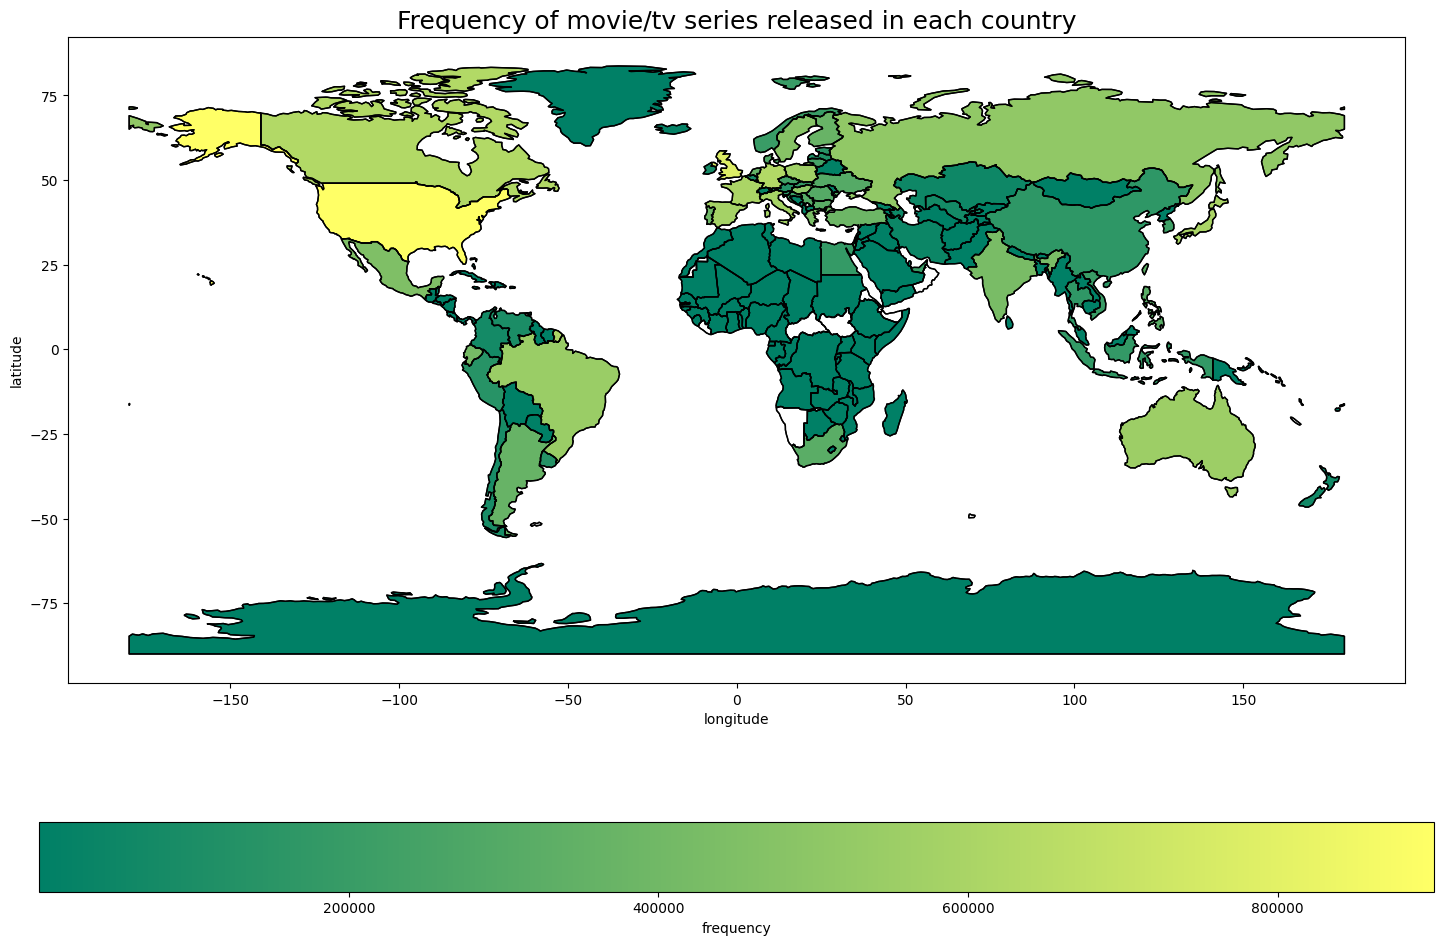

In [ ]:
# merge 'world_data' and 'df' using their respective keys
# 'ISO_A2_EH'(for countries in 'world_data') and 'country' (in 'df')
merged = world_data.set_index('ISO_A2_EH').join(df.set_index('country'), how='left')
# how='left': keeps all rows from 'world_data', even if no match exists in 'df'

fig, ax = plt.subplots(1, 1, figsize=(18, 12))

# plot the boundaries of countries in black
merged.boundary.plot(ax=ax, linewidth=1, color='black')  
# plot the countries and use the 'frequency' column to color them
merged.plot(column='frequency', ax=ax, legend=True,
            legend_kwds={'label': "frequency",
                         'orientation': "horizontal"},
            cmap='summer', edgecolor='black', missing_kwds={"color": "white"})

plt.title('Frequency of movie/tv series released in each country', fontsize=18)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()